In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [83]:
file_path = 'ploting.txt'
df = pd.read_csv(file_path, sep=';')

columns = ['Model', 'Epochs', 'Learning Rate', 'Accuracy', 'Parameters','Factorized', 'Quantize', 'DA', 'Prune Size', 'Prune Type','Prune Ratio[%]', 'Time[min]', 'Train Losses', 'Test Losses','Accuracies', ' batch_size']

print(df[columns])


           Model  Epochs  Learning Rate  Accuracy  Parameters  Factorized  \
0   PreActResNet       1           0.05     14.67     4931196       False   
1   PreActResNet       1           0.05     10.28     4926096       False   
2   PreActResNet       1           0.05     10.02     4920996       False   
3   PreActResNet       1           0.05     10.02     4915896       False   
4   PreActResNet       1           0.05     10.74     4910796       False   
5   PreActResNet       1           0.05     10.00     4905596       False   
6   PreActResNet       1           0.05     20.98     3527804        True   
7   PreActResNet       1           0.05     11.16     3522704        True   
8   PreActResNet       1           0.05     10.53     3517604        True   
9   PreActResNet       1           0.05     10.00     3512504        True   
10  PreActResNet       1           0.05     10.00     3507404        True   
11  PreActResNet       1           0.05     10.00     3502204        True   

In [84]:
epochs = 'Epochs'
acc = 'Accuracy'
lr = 'Learning Rate'
MX = 'MixUp'
params = 'Parameters'
amount = 'Amount'

In [85]:
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return float(value.replace('[', '').replace(']', '').split(',')[0])  # Assuming the first value is correct

In [86]:
# row = 9
# epochs = df.loc[row]['Epochs']
# epochs = range(1,epochs+1)

# train_losses = df.loc[row]['Train Losses'].strip('[]').split(',')
# train_losses = np.array(train_losses, dtype=float).astype(float)
# test_losses = df.loc[row]['Test Losses'].strip('[]').split(',')
# test_losses = np.array(test_losses, dtype=float).astype(float)


# # plt.figure(1)
# # plt.plot(epochs, train_losses, label='Train Losses', color='blue', alpha=0.5)
# # plt.plot(epochs, test_losses, label='Test Losses', color='red', alpha=0.5)

# # plt.xlabel('Epochs')
# # plt.ylabel('Value')
# # plt.title('Losses over Epochs')
# # plt.legend()
# # plt.grid(True)
# # plt.show()
# # plt.savefig('images/Project/PreAct_100_DA_losses.png')

# accuracies = df.loc[row]['Accuracies'].strip('[]').split(',')
# accuracies = np.array(accuracies, dtype=float).astype(float)

# plt.figure(2)
# plt.plot(epochs, accuracies, label='Accuracies')

# plt.xlabel('Epochs')
# plt.ylabel('Value')
# plt.title('Accuracy over Epochs')
# plt.legend()
# plt.grid(True)
# plt.show()
# # plt.savefig('images/Project/PreAct_100_DA_accuracies.png')


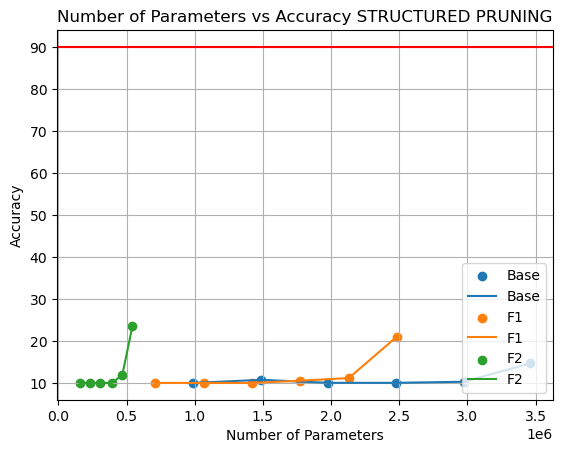

In [87]:
rows1 = [0,1,2,3,4,5]
rows2 = [6,7,8,9,10,11]
rows3 = [12,13,14,15,16,17]
parameters1 = df.loc[rows1, 'Parameters']
accuracy1 = df.loc[rows1, 'Accuracy'].reset_index(drop=True)
prune1 = df.loc[rows1,'Prune Size'].reset_index(drop=True)

parameters2 = df.loc[rows2, 'Parameters']
accuracy2 = df.loc[rows2, 'Accuracy'].reset_index(drop=True)
prune2 = df.loc[rows2,'Prune Size'].reset_index(drop=True)

parameters3 = df.loc[rows3, 'Parameters']
accuracy3 = df.loc[rows3, 'Accuracy'].reset_index(drop=True)
prune3 = df.loc[rows3,'Prune Size'].reset_index(drop=True)

n = ['0.3','0.4','0.5','0.6','0.7','0.8']


plt.scatter(prune1, accuracy1)
plt.plot(prune1, accuracy1)

plt.scatter(prune2, accuracy2)
plt.plot(prune2, accuracy2)

plt.scatter(prune3, accuracy3)
plt.plot(prune3, accuracy3)

plt.axhline(y = 90, color = 'r', linestyle = '-') 
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.title('Number of Parameters vs Accuracy STRUCTURED PRUNING')
plt.grid(True)
plt.legend(("Base","Base","F1","F1","F2","F2"), loc='lower right')
# plt.show()
plt.savefig('images/Project/Base_vs_F1_vs_F2_E150_StructuredPruning.png')